# Wine Quality Prediction

### Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv(r'C:/Data Sets/winequality-red.csv')

In [38]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [39]:
data.shape

(1599, 12)

In [40]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [41]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
duplicate_rows = data.duplicated()
duplicate_rows_count = duplicate_rows.sum()

if duplicate_rows_count > 0:
    print("The dataset contains", duplicate_rows_count, "duplicate rows.")
else:
    print("The dataset does not contain any duplicate rows.")

The dataset contains 240 duplicate rows.


In [44]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
496,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6
324,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
774,7.9,0.40,0.30,1.8,0.157,2.0,45.0,0.99727,3.31,0.91,9.5,6
1429,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5
623,7.9,0.51,0.25,2.9,0.077,21.0,45.0,0.99740,3.49,0.96,12.1,6


In [45]:
data.drop_duplicates(inplace=True)

In [46]:
data.shape

(1359, 12)

### Exploratory Data Analysis(EDA)

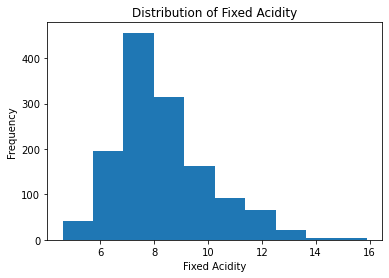

In [47]:
plt.hist(data['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Distribution of Fixed Acidity')
plt.show()

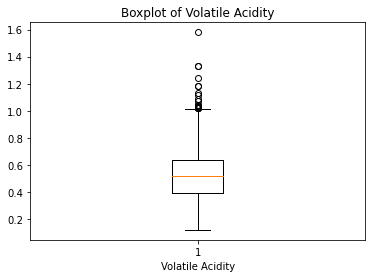

In [48]:
plt.boxplot(data['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.title('Boxplot of Volatile Acidity')
plt.show()

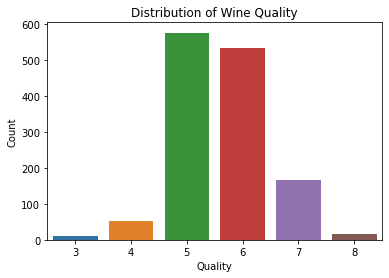

In [49]:
sns.countplot(x='quality',data=data)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

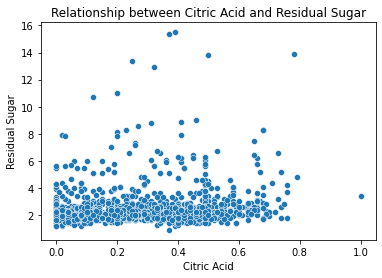

In [50]:
sns.scatterplot(x='citric acid',y='residual sugar',data=data)
plt.xlabel('Citric Acid')
plt.ylabel('Residual Sugar')
plt.title('Relationship between Citric Acid and Residual Sugar')
plt.show()

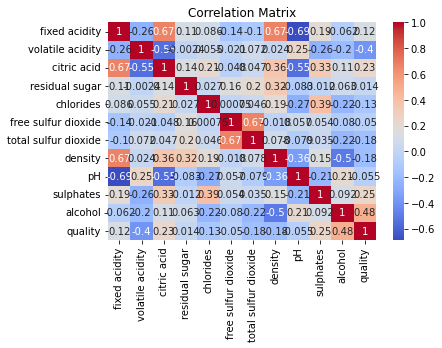

In [51]:
correlation_matrix=data.corr()
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [55]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Splitting Data

In [63]:
from sklearn.model_selection import train_test_split as tts
X=data.drop('quality',axis=1)
y=data['quality']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1359, 11)
Shape of y: (1359,)


In [65]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

### Model Selection

### 1.Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,y_train)


LinearRegression()

In [76]:
lin_pred=lin.predict(X_test)

In [78]:
lin_pred

array([5.24560141, 5.80993501, 6.36840525, 5.15873325, 5.19928608,
       6.77639051, 5.70671729, 4.84475677, 5.79995509, 5.73940516,
       6.31682662, 5.8811928 , 5.9996561 , 5.50701065, 6.303201  ,
       5.24260556, 5.99829935, 5.3004913 , 5.21172492, 5.84721673,
       5.24978431, 6.18083232, 5.27576398, 4.7536382 , 5.77617182,
       4.78086977, 5.67494132, 5.42177579, 5.24347084, 5.39490416,
       6.0495205 , 6.35416608, 5.75837867, 4.69710175, 5.66696086,
       6.28753264, 4.83859429, 5.88995531, 5.30180927, 6.16094656,
       5.25479577, 5.76262723, 6.02609429, 4.60442536, 5.46535099,
       5.44266437, 5.07197895, 4.34884089, 5.23447957, 5.83901932,
       5.57123187, 6.05205231, 5.8957589 , 5.61986404, 6.28696279,
       5.14610584, 5.27058482, 5.24733764, 5.03081646, 6.05969272,
       4.89304458, 6.10373861, 5.17017403, 5.90151174, 5.75740602,
       5.94939493, 5.08949113, 5.47974338, 6.11642113, 6.05651297,
       5.55312376, 5.99121925, 5.94773207, 6.02915318, 5.82986

### 2.DecisionTree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [88]:
dt_pred=dt.predict(X_test)

In [90]:
dt_pred

array([5., 6., 7., 6., 3., 7., 6., 5., 7., 6., 8., 6., 6., 6., 7., 5., 5.,
       5., 5., 5., 5., 6., 5., 5., 6., 5., 6., 5., 5., 6., 6., 4., 6., 6.,
       5., 7., 5., 6., 6., 6., 4., 6., 4., 5., 5., 7., 5., 4., 5., 7., 6.,
       6., 5., 6., 5., 5., 6., 3., 5., 5., 5., 5., 6., 6., 6., 6., 5., 5.,
       7., 7., 6., 8., 6., 6., 5., 5., 5., 5., 5., 5., 5., 7., 5., 5., 5.,
       6., 5., 5., 6., 6., 6., 4., 5., 6., 6., 6., 3., 8., 6., 5., 4., 5.,
       4., 6., 6., 5., 6., 7., 5., 5., 6., 6., 5., 5., 5., 6., 4., 5., 5.,
       7., 5., 6., 7., 6., 5., 4., 5., 5., 5., 4., 5., 5., 6., 7., 5., 3.,
       5., 5., 5., 5., 5., 5., 6., 5., 6., 5., 5., 6., 5., 5., 5., 5., 6.,
       5., 5., 6., 6., 6., 7., 6., 6., 5., 5., 7., 5., 6., 6., 5., 7., 6.,
       6., 6., 5., 6., 6., 6., 6., 5., 5., 7., 5., 7., 6., 5., 5., 5., 5.,
       5., 6., 6., 6., 5., 7., 6., 6., 5., 6., 6., 7., 6., 5., 7., 5., 7.,
       4., 6., 5., 5., 7., 6., 7., 6., 6., 5., 7., 5., 7., 7., 4., 6., 6.,
       8., 5., 6., 6., 5.

### 3.Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [99]:
rf_pred=rf.predict(X_test)

In [101]:
rf_pred

array([4.96, 5.99, 6.39, 5.46, 5.44, 6.89, 5.46, 5.24, 5.9 , 5.58, 6.57,
       5.81, 5.84, 5.52, 6.29, 5.03, 5.79, 5.11, 5.  , 6.08, 5.09, 6.13,
       5.09, 4.87, 5.53, 5.05, 5.87, 5.47, 5.22, 5.66, 5.99, 5.81, 5.75,
       5.  , 5.16, 6.29, 5.05, 6.06, 5.49, 6.12, 4.83, 5.71, 6.14, 4.91,
       5.63, 5.41, 5.05, 4.94, 5.25, 6.13, 5.93, 6.47, 6.39, 5.4 , 6.16,
       5.02, 5.72, 5.24, 5.24, 5.43, 5.01, 6.15, 5.21, 6.44, 5.36, 6.08,
       5.14, 5.19, 6.06, 6.41, 5.22, 7.51, 6.01, 6.2 , 5.89, 5.08, 5.22,
       5.47, 5.27, 5.16, 6.03, 5.77, 5.43, 5.13, 5.36, 6.27, 5.33, 5.05,
       5.94, 5.91, 5.94, 4.8 , 4.92, 5.49, 5.95, 6.03, 4.95, 6.96, 6.07,
       5.28, 4.95, 5.02, 5.12, 5.43, 5.56, 5.27, 6.09, 6.59, 6.42, 6.47,
       5.76, 5.51, 5.09, 5.35, 5.14, 5.45, 4.99, 5.24, 5.4 , 6.2 , 5.15,
       5.53, 5.57, 5.82, 5.52, 5.33, 4.81, 5.08, 5.63, 5.36, 5.57, 5.27,
       5.81, 5.87, 5.16, 4.61, 6.73, 5.54, 6.11, 5.31, 5.53, 5.09, 6.44,
       5.57, 5.62, 6.17, 5.64, 5.66, 5.75, 5.28, 5.

In [105]:
from sklearn.metrics import mean_squared_error as mse

In [110]:
print("The MSE of Linear Regression Model:",mse(y_test,lin_pred))
print("The MSE of Decision Tree Regressor Model:",mse(y_test,dt_pred))
print("The MSE of Random Forest Model:",mse(y_test,rf_pred))

The MSE of Linear Regression Model: 0.43100900509009665
The MSE of Decision Tree Regressor Model: 0.8823529411764706
The MSE of Random Forest Model: 0.3891102941176471
